In [86]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, norm, mannwhitneyu, wilcoxon
import math
import itertools

Define The Halving Dates and the Regions Of Interest Around Them

In [87]:
halving_dates=[
datetime.datetime.strptime('2012/11/28', '%Y/%m/%d'),
datetime.datetime.strptime('2016/07/09', '%Y/%m/%d'),
datetime.datetime.strptime('2020/05/11', '%Y/%m/%d'),
datetime.datetime.strptime('2024/04/19', '%Y/%m/%d')
]
halving_dates

[datetime.datetime(2012, 11, 28, 0, 0),
 datetime.datetime(2016, 7, 9, 0, 0),
 datetime.datetime(2020, 5, 11, 0, 0),
 datetime.datetime(2024, 4, 19, 0, 0)]

In [88]:
halving_regions = [(x - datetime.timedelta(days=180), x + datetime.timedelta(days=180)) for x in halving_dates]
halving_regions

[(datetime.datetime(2012, 6, 1, 0, 0), datetime.datetime(2013, 5, 27, 0, 0)),
 (datetime.datetime(2016, 1, 11, 0, 0), datetime.datetime(2017, 1, 5, 0, 0)),
 (datetime.datetime(2019, 11, 13, 0, 0), datetime.datetime(2020, 11, 7, 0, 0)),
 (datetime.datetime(2023, 10, 22, 0, 0),
  datetime.datetime(2024, 10, 16, 0, 0))]

Load The Data

In [89]:
df = pd.read_csv('data/bitcoin_2010-07-17_2024-05-23.csv')
df = df[['Start', 'Close']]
# df['Close'] = np.log(df['Close'])
df = df.set_index('Start')
df = df.astype(float)
df = df.sort_index()
df.index = pd.to_datetime(df.index)
df.head()

,Close
Start,
2010-07-17,0.0500
2010-07-18,0.0858
2010-07-19,0.0808
2010-07-20,0.0747
2010-07-21,0.0792


In [90]:
df['mean_15'] = df['Close'].rolling(window=15).mean().fillna(0)
df['std_15'] = df['Close'].rolling(window=15).std().fillna(0)
df.head(100)


,Close,mean_15,std_15
Start,,,
2010-07-17,0.0500,0.000000,0.000000
2010-07-18,0.0858,0.000000,0.000000
2010-07-19,0.0808,0.000000,0.000000
2010-07-20,0.0747,0.000000,0.000000
2010-07-21,0.0792,0.000000,0.000000
...,...,...,...
2010-10-20,0.0990,0.094020,0.012774
2010-10-21,0.1070,0.096967,0.009813
2010-10-22,0.1025,0.099333,0.005323


Text(0.5, 1.0, 'BTC Historical Price Chart')

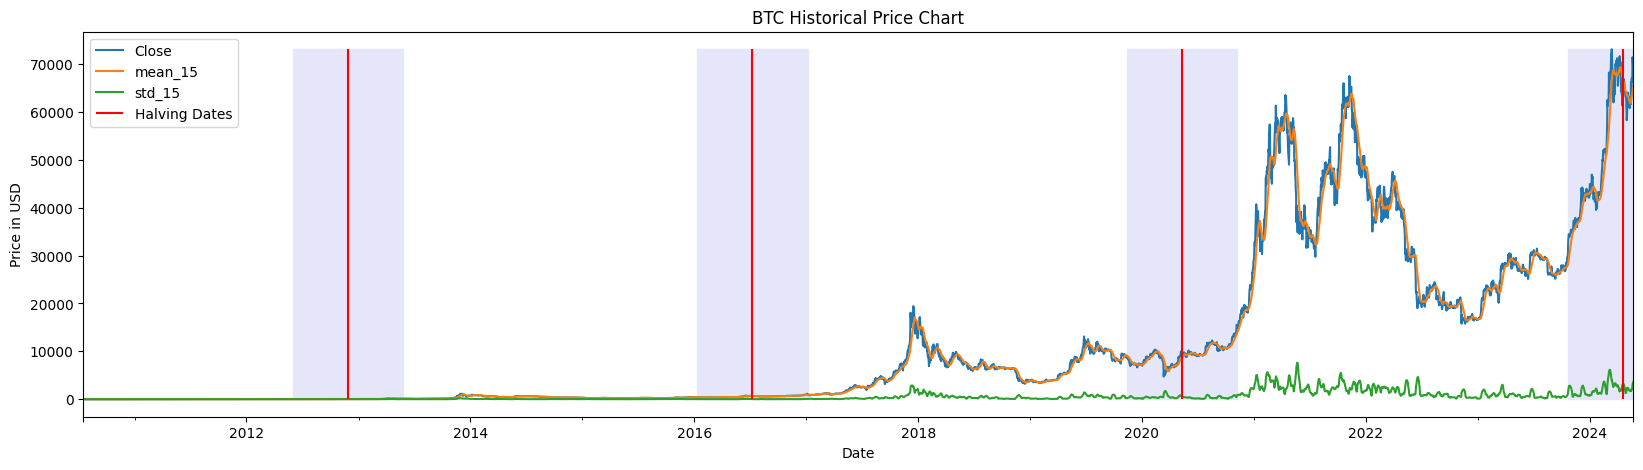

In [91]:
ax = df.plot(figsize=(20,5))
ax.vlines(halving_dates, 0, df['Close'].max(), colors='r', label='Halving Dates')
for item in halving_regions:
    ax.fill_between(item, 0 , df['Close'].max(), color='lavender',)
ax.legend()
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('BTC Historical Price Chart')

Text(0.5, 1.0, 'BTC Historical Price Chart')

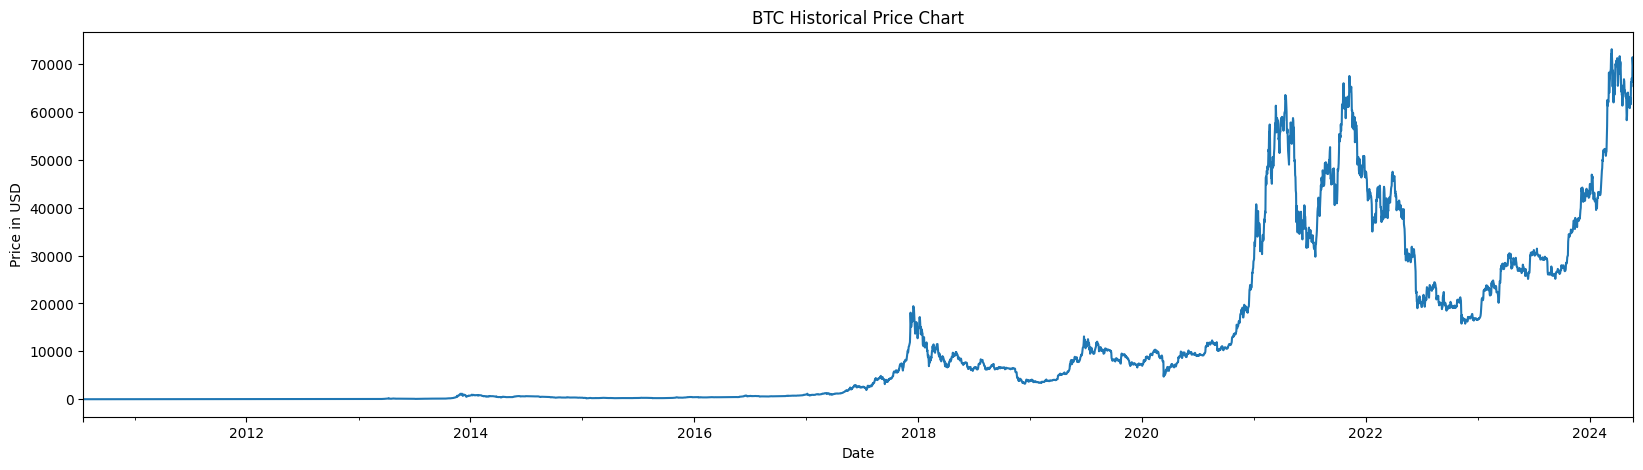

In [92]:
ax = df['Close'].plot(figsize=(20,5))
# ax.vlines(halving_dates, 0, df['Close'].max(), colors='r', label='Halving Dates')
# for item in halving_regions:
#     ax.fill_between(item, 0 , df['Close'].max(), color='lavender',)
# ax.legend()
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('BTC Historical Price Chart')

Divide into 8 segments: 4 segments whitin 1 year of the halvings, and the 4 segments in between them

In [93]:
halving_data = []
nonhalving_data = []

for idx, item in enumerate(halving_regions):
    # halving_data.append(df.loc[])
    halving_data.append(df.loc[item[0] : item[1]])
    if idx == 0:
        nonhalving_data.append(df.loc[ : item[0]])
    else: 
        nonhalving_data.append(df.loc[halving_regions[idx -1][1] : item[0]])

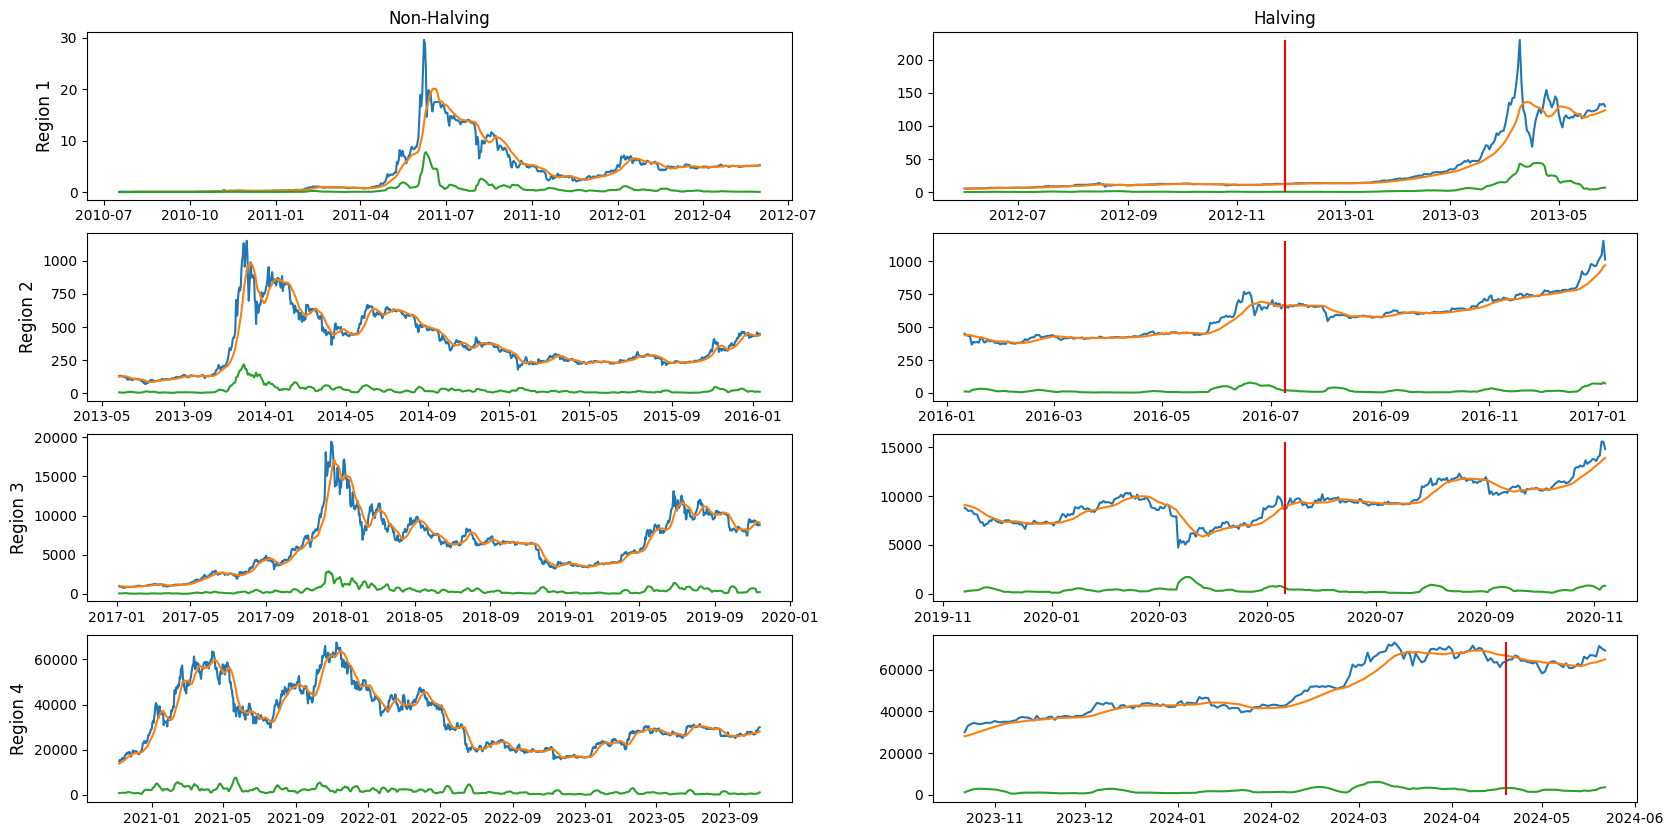

In [94]:
ctr = 1
fig, ax = plt.subplots(4,2, figsize=(20,10))
for nhd, hd in zip(nonhalving_data, halving_data):
    ax[ctr -1][0].plot(nhd)
    ax[ctr -1][1].plot(hd)
    ax[ctr -1][1].vlines(halving_dates[ctr - 1], 0, hd['Close'].max(), colors='r', label='Halving Date')
    ctr += 1
ax[0][0].set_title('Non-Halving')
ax[0][1].set_title('Halving')
for i in range(4):
    ax[i][0].set_ylabel(f'Region {i+1}', rotation=90, size='large')


Analysis on Volatility (Standard Deviation)

Text(0.5, 0.98, '15-Day Volatility')

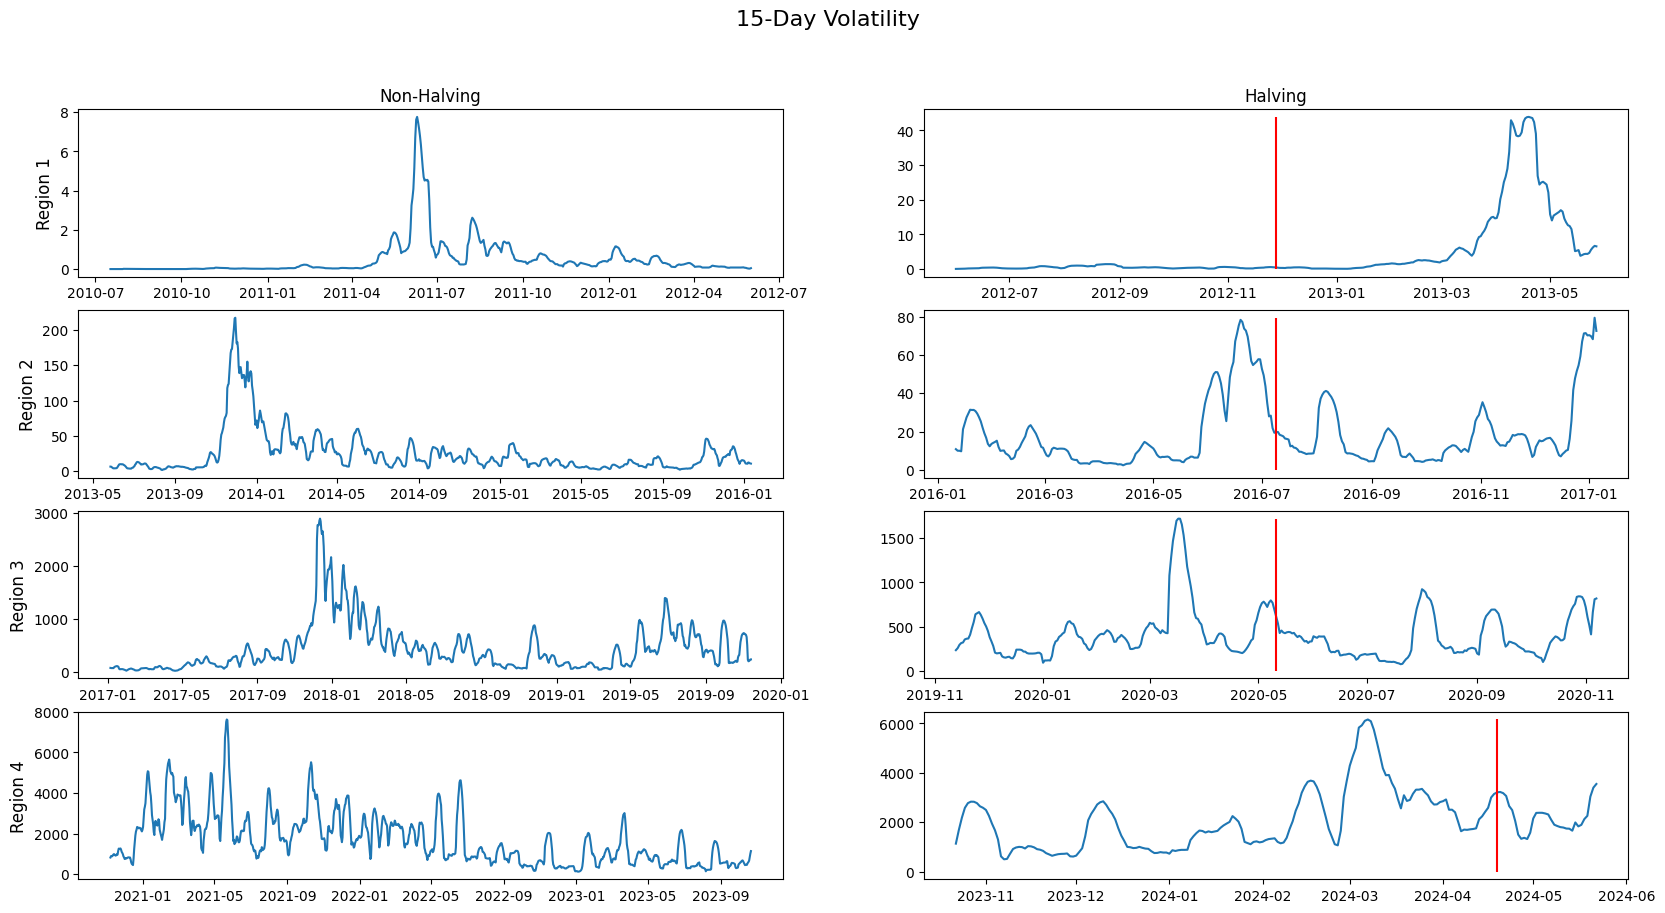

In [95]:
ctr = 1
fig, ax = plt.subplots(4,2, figsize=(20,10))
for nhd, hd in zip(nonhalving_data, halving_data):
    ax[ctr -1][0].plot(nhd['std_15'])
    ax[ctr -1][1].plot(hd['std_15'])
    ax[ctr -1][1].vlines(halving_dates[ctr - 1], 0, hd['std_15'].max(), colors='r', label='Halving Date')
    ctr += 1
ax[0][0].set_title('Non-Halving')
ax[0][1].set_title('Halving')
for i in range(4):
    ax[i][0].set_ylabel(f'Region {i+1}', rotation=90, size='large')

fig.suptitle('15-Day Volatility',fontsize=16)

Text(0.5, 0.98, '15-Day Volatility Distribution')

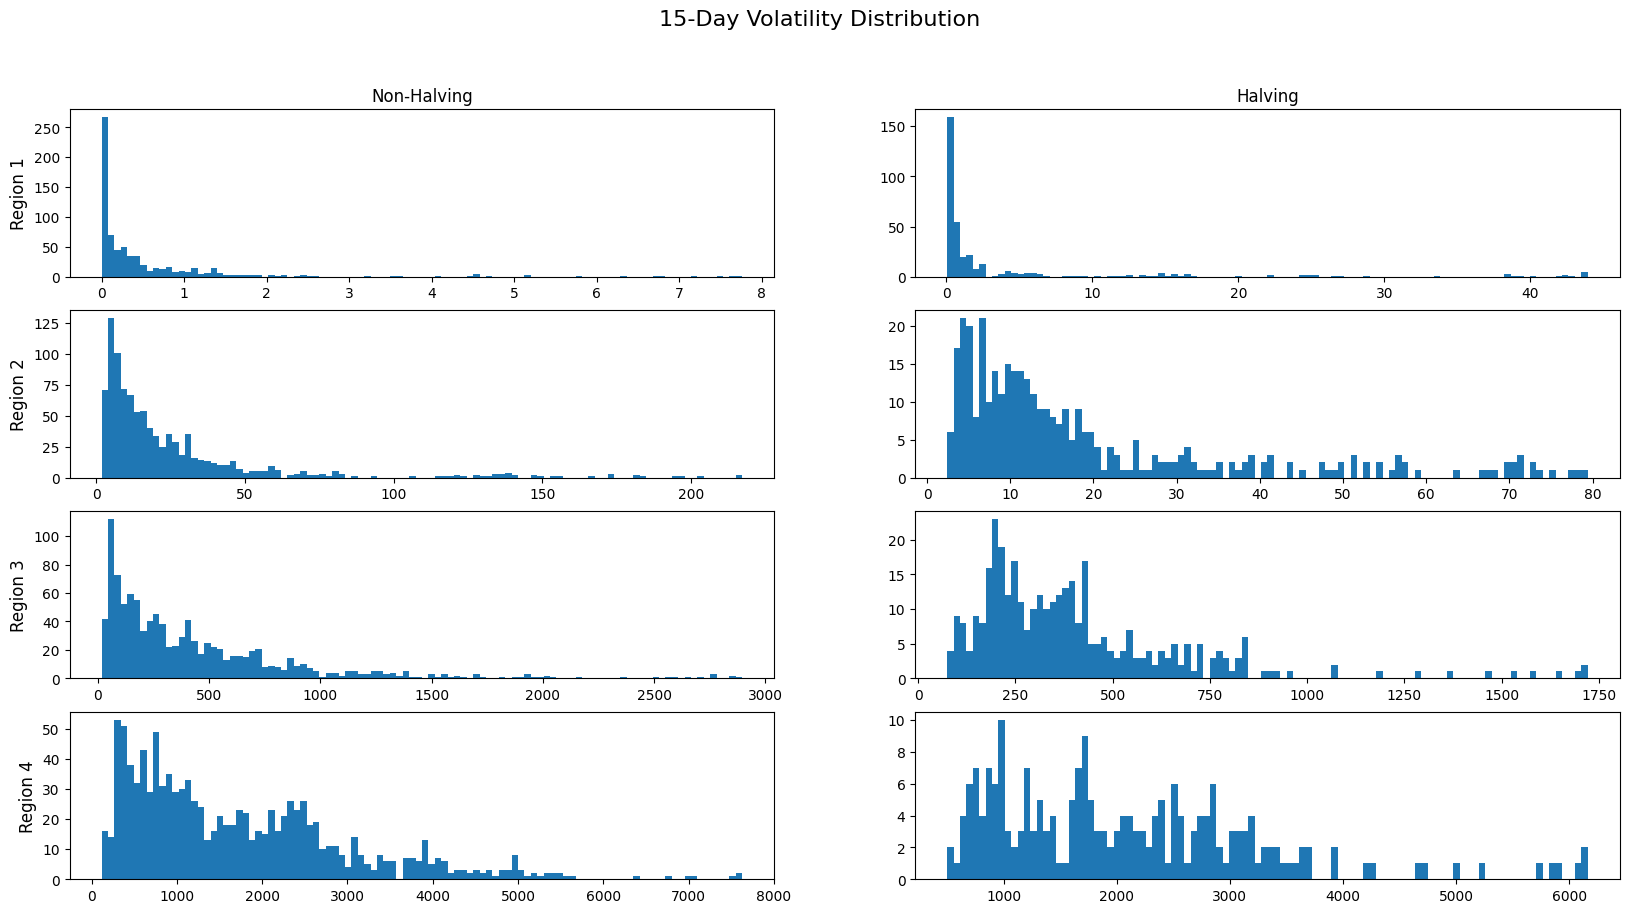

In [96]:
ctr = 1
fig, ax = plt.subplots(4,2, figsize=(20,10))
for nhd, hd in zip(nonhalving_data, halving_data):
    ax[ctr -1][0].hist(nhd['std_15'], bins=100)
    ax[ctr -1][1].hist(hd['std_15'], bins=100)
    ctr += 1
ax[0][0].set_title('Non-Halving')
ax[0][1].set_title('Halving')
for i in range(4):
    ax[i][0].set_ylabel(f'Region {i+1}', rotation=90, size='large')
fig.suptitle('15-Day Volatility Distribution',fontsize=16)

We check which probablilty distribution function fits them best

In [97]:
from scipy import stats

distributions = {
    'Normal': stats.norm,
    'Exponential': stats.expon,
    'Logistic': stats.logistic,
    'Cosine': stats.cosine,
    'Cauchy': stats.cauchy,
    'T-distribution': stats.t,
    'Chi-square': stats.chi2,
    'Gamma': stats.gamma,
    'Folded normal' : stats.foldnorm,
    'Gauss hypergeometric': stats.gausshyper,
    'Power-Function ': stats.powerlaw,
}

(686,)
Normal distribution: D=0.3072919294640344, p-value=5.2359120219863435e-58
Exponential distribution: D=0.2576719838800123, p-value=1.1784307622119855e-40
Logistic distribution: D=0.284027636054673, p-value=1.8348980960339477e-49
Cosine distribution: D=0.4421105723058444, p-value=1.1727052653120068e-122
Cauchy distribution: D=0.2996400349416348, p-value=4.0744264039940234e-55
T-distribution distribution: D=0.31637720017506343, p-value=1.5229269454270707e-61
Chi-square distribution: D=0.14897291365125076, p-value=9.380780806205302e-14
Gamma distribution: D=0.1300135492802887, p-value=1.4332070244991678e-10
Folded normal distribution: D=0.42141500986731173, p-value=5.8006524737557216e-111
Gauss hypergeometric distribution: D=0.14375846913092827, p-value=7.795045054761106e-13
Power-Function  distribution: D=0.5849937876301486, p-value=1.0009227604327279e-223

Best Fit for Region 1: Gamma, p_value=1.0009227604327279e-223




/home/andy/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:7940: RuntimeWarning: overflow encountered in divide
  return (shape - 1) * np.sum(1 / (loc - data))  # -1/(data-loc)
/home/andy/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(960,)
Normal distribution: D=0.2355511485154213, p-value=2.450935679583109e-47
Exponential distribution: D=0.08833751611456764, p-value=5.736521356621959e-07
Logistic distribution: D=0.21126640494060148, p-value=4.489535420141453e-38
Cosine distribution: D=0.40408435578191515, p-value=4.2817562361629565e-142
Cauchy distribution: D=0.21126135934044546, p-value=4.5083409043083123e-38
T-distribution distribution: D=0.19741709872859187, p-value=2.9208931754425602e-33
Chi-square distribution: D=0.054060196367849735, p-value=0.007037655828131175
Gamma distribution: D=0.8145749180211135, p-value=0.0
Folded normal distribution: D=0.2708634513040634, p-value=1.0477867371888671e-62


/home/andy/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:4374: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Gauss hypergeometric distribution: D=0.1962246131561025, p-value=7.31394450486601e-33
Power-Function  distribution: D=0.30109717590121654, p-value=1.0767915918673795e-77

Best Fit for Region 2: Chi-square, p_value=1.0767915918673795e-77


(1043,)
Normal distribution: D=0.18016483805689104, p-value=4.292071102966564e-30
Exponential distribution: D=0.043753656879088165, p-value=0.035782641367423595
Logistic distribution: D=0.17064654642411164, p-value=5.038746694746938e-27
Cosine distribution: D=0.3334966626698246, p-value=6.529436180302401e-104
Cauchy distribution: D=0.20856095438002967, p-value=2.832740840871119e-40
T-distribution distribution: D=0.17380311002911533, p-value=5.04999504160145e-28
Chi-square distribution: D=0.9868795628687366, p-value=0.0
Gamma distribution: D=0.9934185284919006, p-value=0.0
Folded normal distribution: D=0.16931255303548254, p-value=1.3148490012361898e-26
Gauss hypergeometric distribution: D=0.20989365749732403, p-value=8.639923443507087e-41
Power-Functi

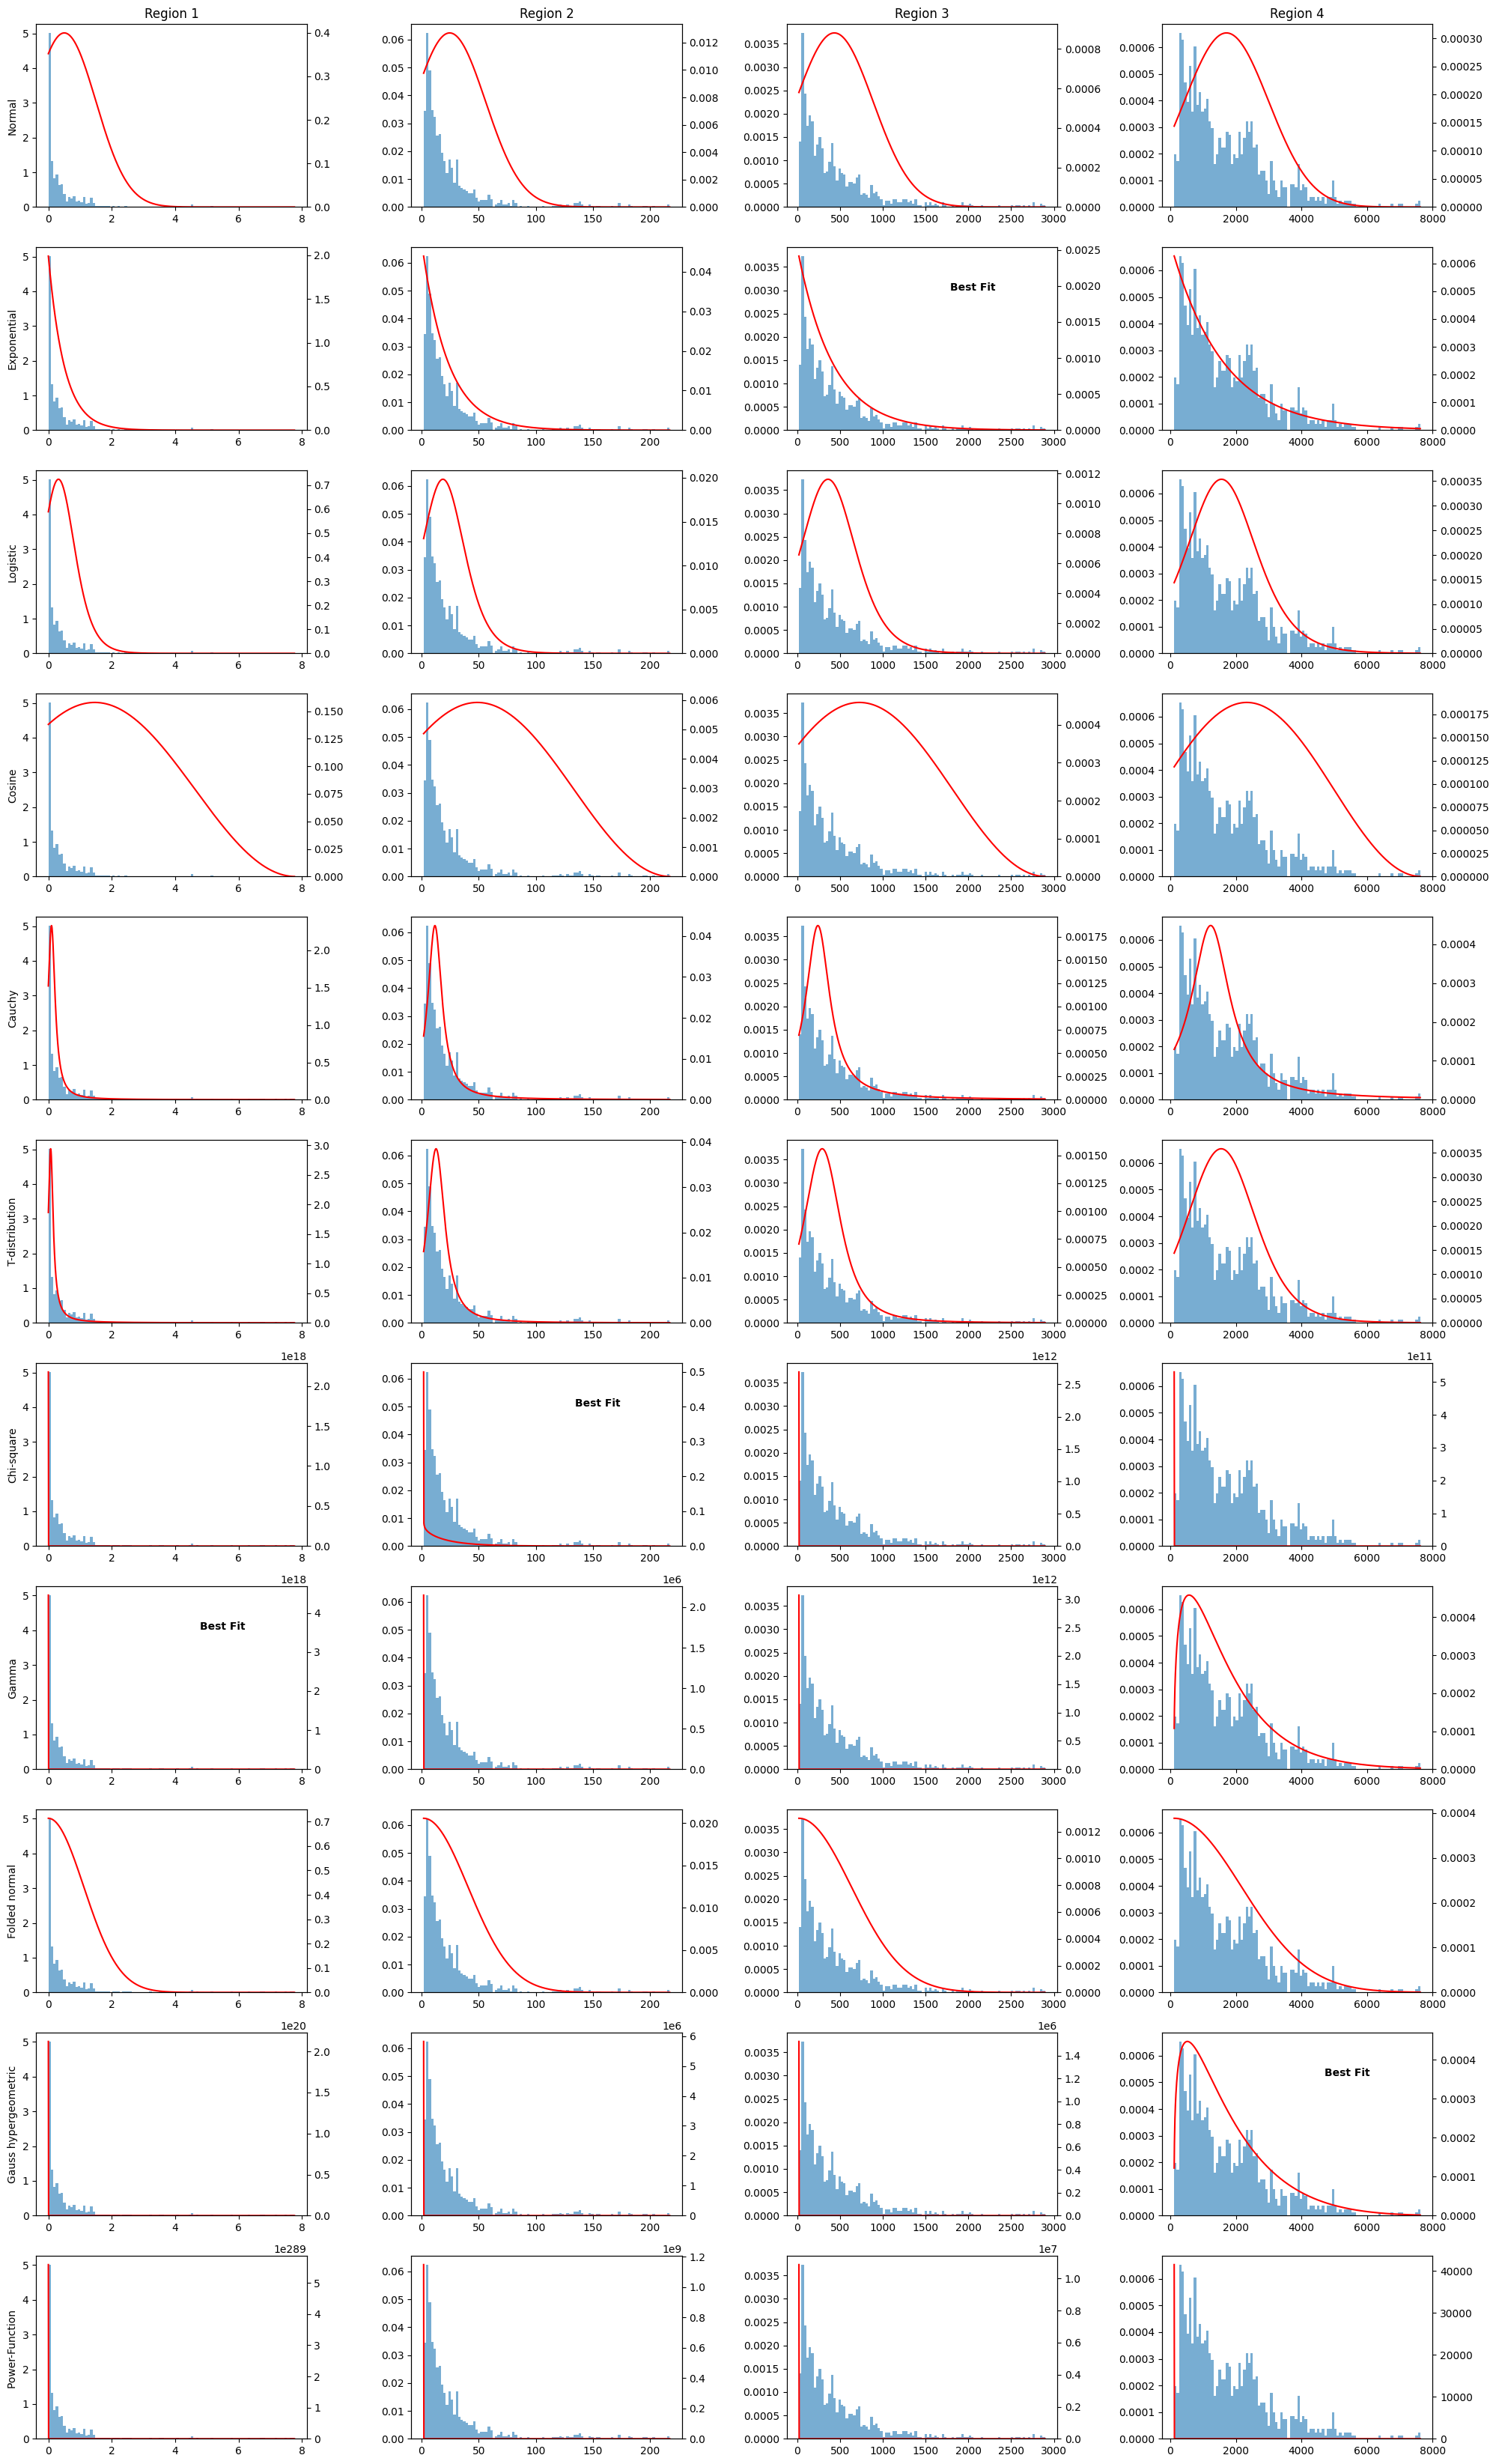

In [98]:
l=len(distributions)
fig, ax = plt.subplots(l,len(nonhalving_data),figsize=(20,l * 3))
company_ctr = 0
fit_results={}
cols = ["Region 1", "Region 2", "Region 3", "Region 4"]
nonhalving_named = zip(cols, nonhalving_data)
for cname, cdata in nonhalving_named:
    print(cdata['std_15'].shape)
    cdata = cdata['std_15']
    ks_results = {}
    largest_p = 0
    best_fit = ''
    for name, distribution in distributions.items():
        params = distribution.fit(cdata)
        D, p_value = stats.kstest(cdata, distribution.cdf, args=params)
        ks_results[name] = {'D': D, 'p_value': p_value}
        if p_value > largest_p:
            best_fit = name
            largest_p = p_value
        print(f"{name} distribution: D={D}, p-value={p_value}")
    fit_results[cname] = best_fit
    print (f"\nBest Fit for {cname}: {best_fit}, p_value={p_value}\n\n")

    x = np.linspace(min(cdata), max(cdata), 1000)
   
    ctr = 0
    for name, distribution in distributions.items():
        params = distribution.fit(cdata)
        pdf_fitted = distribution.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
        ax[ctr][company_ctr].hist(cdata, bins=100, density=True, alpha=0.6,)
        tx = ax[ctr][company_ctr].twinx()
        if name == fit_results[cname]:
            tx.text(max(x)*0.8, max(pdf_fitted)*0.8, "Best Fit", horizontalalignment='right', fontweight='bold')
        tx.plot(x, pdf_fitted, label='', color = 'r')
        tx.set_ylim(0)
        ctr += 1
    company_ctr += 1

# cols = [x for x,y in nonhalving_named]
rows = [x for x, y in distributions.items()]
print (cols)
for axs, col in zip(ax[0], cols):
    axs.set_title(col,size='large')

for axs, row in zip(ax[:,0], rows):
    axs.set_ylabel(row, rotation=90 )

fig.tight_layout()

(361,)
Normal distribution: D=0.3487197576671748, p-value=9.709710754996155e-40
Exponential distribution: D=0.42682967999539245, p-value=3.2575594374212715e-60
Logistic distribution: D=0.34765038990091346, p-value=1.7172973727223704e-39
Cosine distribution: D=0.41230814009516015, p-value=4.846557626938341e-56
Cauchy distribution: D=0.2501194226368792, p-value=2.194022808269083e-20
T-distribution distribution: D=0.2509208756610233, p-value=1.627293202950973e-20
Chi-square distribution: D=0.25542314621889817, p-value=2.9802900986946163e-21
Gamma distribution: D=0.25030539428962634, p-value=2.0472308329475204e-20
Folded normal distribution: D=0.5840771680815161, p-value=1.4108693023803808e-117
Gauss hypergeometric distribution: D=0.21804042287547237, p-value=1.505235031205079e-15
Power-Function  distribution: D=0.27176253940147066, p-value=4.803748597182489e-24

Best Fit for Region 1: Gauss hypergeometric, p_value=4.803748597182489e-24


(361,)
Normal distribution: D=0.20500200084375142, 

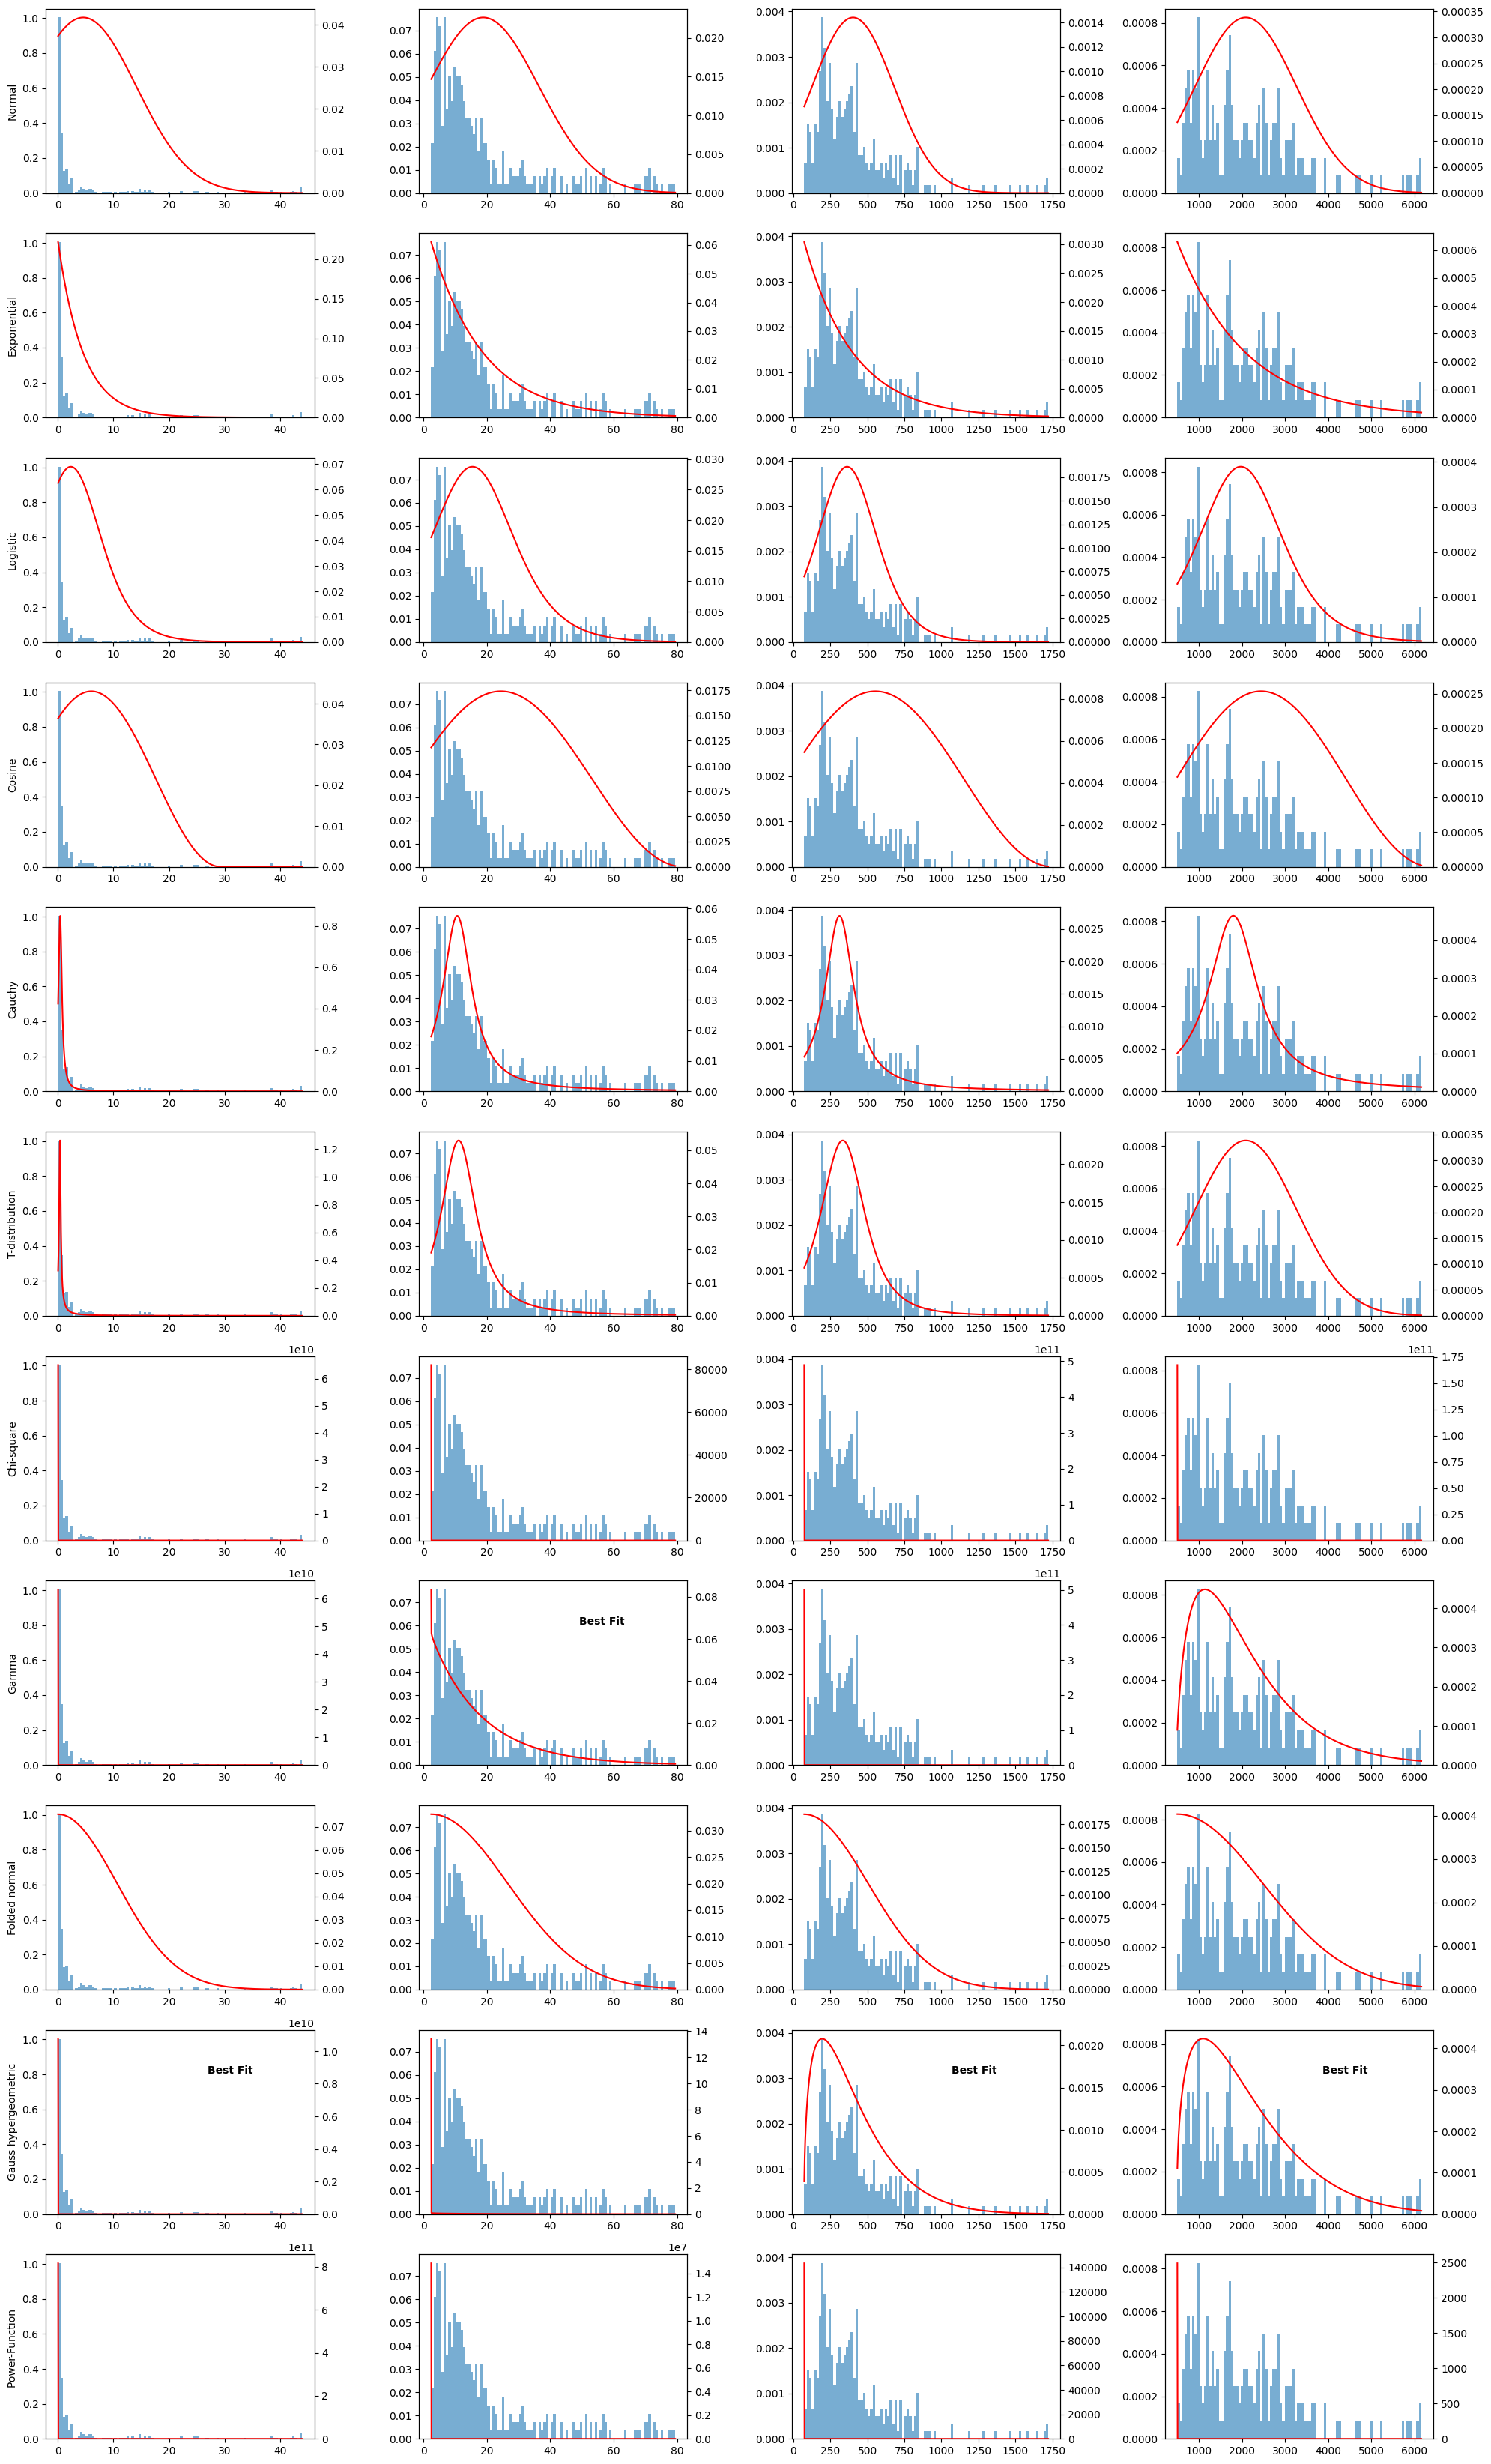

In [99]:
l=len(distributions)
fig, ax = plt.subplots(l,len(halving_data),figsize=(20,l * 3))
company_ctr = 0
fit_results={}
cols = ["Region 1", "Region 2", "Region 3", "Region 4"]
halving_named = zip(cols, halving_data)
for cname, cdata in halving_named:
    print(cdata['std_15'].shape)
    cdata = cdata['std_15']
    ks_results = {}
    largest_p = 0
    best_fit = ''
    for name, distribution in distributions.items():
        params = distribution.fit(cdata)
        D, p_value = stats.kstest(cdata, distribution.cdf, args=params)
        ks_results[name] = {'D': D, 'p_value': p_value}
        if p_value > largest_p:
            best_fit = name
            largest_p = p_value
        print(f"{name} distribution: D={D}, p-value={p_value}")
    fit_results[cname] = best_fit
    print (f"\nBest Fit for {cname}: {best_fit}, p_value={p_value}\n\n")

    x = np.linspace(min(cdata), max(cdata), 1000)
   
    ctr = 0
    for name, distribution in distributions.items():
        params = distribution.fit(cdata)
        pdf_fitted = distribution.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
        ax[ctr][company_ctr].hist(cdata, bins=100, density=True, alpha=0.6,)
        tx = ax[ctr][company_ctr].twinx()
        if name == fit_results[cname]:
            tx.text(max(x)*0.8, max(pdf_fitted)*0.8, "Best Fit", horizontalalignment='right', fontweight='bold')
        tx.plot(x, pdf_fitted, label='', color = 'r')
        tx.set_ylim(0)
        ctr += 1
    company_ctr += 1

cols = [x for x,y in halving_named]
rows = [x for x, y in distributions.items()]

for axs, col in zip(ax[0], cols):
    axs.set_title(col,size='large')

for axs, row in zip(ax[:,0], rows):
    axs.set_ylabel(row, rotation=90 )

fig.tight_layout()

Since the distributions have been established as not normal, we use non-parametric tests.

 Mann-Whitney U Test

In [100]:
alpha = 0.05
p_values = {}
for i in range(len(halving_data)):
    stat, p_value = mannwhitneyu(halving_data[i]['std_15'], nonhalving_data[i]['std_15'])
    print(f'Region = {i+1}')
    print(f'stat      = {stat}')
    print(f'p-value = {p_value}')
    p_values[i] = p_value
    if p_value <= alpha:
        print(f'p-value less than alpha! Reject H0.\n\n')
    else:
        print(f'p-value greater than alpha! Cannot Reject H0.\n\n')

Region = 1
stat      = 190507.5
p-value = 1.2498277448792928e-46
p-value less than alpha! Reject H0.


Region = 2
stat      = 160731.5
p-value = 0.04227859287284292
p-value less than alpha! Reject H0.


Region = 3
stat      = 209910.5
p-value = 0.001112150497068756
p-value less than alpha! Reject H0.


Region = 4
stat      = 142528.5
p-value = 6.667806693277911e-08
p-value less than alpha! Reject H0.




In [101]:
# print(p_values)
df_stat=pd.DataFrame()
df_stat['region']=p_values.keys()
df_stat['p_value']=p_values.values()
alpha = 0.05
df_stat.sort_values(by='p_value', inplace=True) # Sort in place!
df_stat['L_thresholds'] = alpha/(df_stat.shape[0] + 1 - (np.arange(df_stat.shape[0]) + 1)) 
df_stat['reject'] = df_stat['p_value'] < df_stat['L_thresholds']
df_stat.reset_index(drop = True, inplace=True)
print(df_stat)
different = 0
if any(df_stat['reject'] == True):
    different = max(df_stat.loc[df_stat['reject'] == True].index +1)
not_different = len(df_stat.index) - different
print(f'\nMann-Whitney U Test - Halving/Non-Halving regions that are not statistically different: {not_different/(different+not_different) * 100}%\n')
    

   region       p_value  L_thresholds  reject
0       0  1.249828e-46      0.012500    True
1       3  6.667807e-08      0.016667    True
2       2  1.112150e-03      0.025000    True
3       1  4.227859e-02      0.050000    True

Mann-Whitney U Test - Halving/Non-Halving regions that are not statistically different: 0.0%



Wilcoxon Signed-Rank Test

In [102]:
alpha = 0.05
p_values = {}
for i in range(len(halving_data)):
    n = len(halving_data[i])
    stat, p_value = wilcoxon(halving_data[i]['std_15'], nonhalving_data[i]['std_15'][:n])
    print(f'Region = {i+1}')
    print(f'stat      = {stat}')
    print(f'p-value = {p_value}')
    p_values[i] = p_value
    if p_value <= alpha:
        print(f'p-value less than alpha! Reject H0.\n\n')
    else:
        print(f'p-value greater than alpha! Cannot Reject H0.\n\n')

Region = 1
stat      = 271.0
p-value = 6.110651804864595e-60
p-value less than alpha! Reject H0.


Region = 2
stat      = 21212.0
p-value = 7.692655277550934e-09
p-value less than alpha! Reject H0.


Region = 3
stat      = 22646.0
p-value = 4.364634915602467e-07
p-value less than alpha! Reject H0.


Region = 4
stat      = 7488.0
p-value = 9.567558652063945e-06
p-value less than alpha! Reject H0.




In [103]:
# print(p_values)
df_stat=pd.DataFrame()
df_stat['region']=p_values.keys()
df_stat['p_value']=p_values.values()
alpha = 0.05
df_stat.sort_values(by='p_value', inplace=True) # Sort in place!
df_stat['L_thresholds'] = alpha/(df_stat.shape[0] + 1 - (np.arange(df_stat.shape[0]) + 1)) 
df_stat['reject'] = df_stat['p_value'] < df_stat['L_thresholds']
df_stat.reset_index(drop = True, inplace=True)
print(df_stat)
different = 0
if any(df_stat['reject'] == True):
    different = max(df_stat.loc[df_stat['reject'] == True].index +1)
not_different = len(df_stat.index) - different
print(f'\nWilcoxon Signed-Rank Test - Halving/Non-Halving regions that are not statistically different: {not_different/(different+not_different) * 100}%\n')

   region       p_value  L_thresholds  reject
0       0  6.110652e-60      0.012500    True
1       1  7.692655e-09      0.016667    True
2       2  4.364635e-07      0.025000    True
3       3  9.567559e-06      0.050000    True

Wilcoxon Signed-Rank Test - Halving/Non-Halving regions that are not statistically different: 0.0%



Two-tailed, Bootstrap

   region  halving_mean  nonhalving_mean  \
0       1      4.550663         0.500944   
1       2     18.754678        24.622582   
2       3    403.089989       432.508135   
3       4   2087.440180      1713.440698   

                                 ci_halving  \
0  [3.6398929848299324, 5.6011106158378325]   
1   [16.93484991344696, 20.516455298210516]   
2   [376.4123154158498, 431.25629820597663]   
3   [1926.461576922623, 2248.0570347416065]   

                              ci_nonhalving  p_value  reject_null  
0  [0.42805055108917306, 0.582607061311654]    0.000         True  
1   [22.777308634700077, 26.60473342328717]    0.000         True  
2  [405.52505003276684, 459.29375040367717]    0.074        False  
3   [1640.7737224861237, 1789.738062236158]    0.000         True  


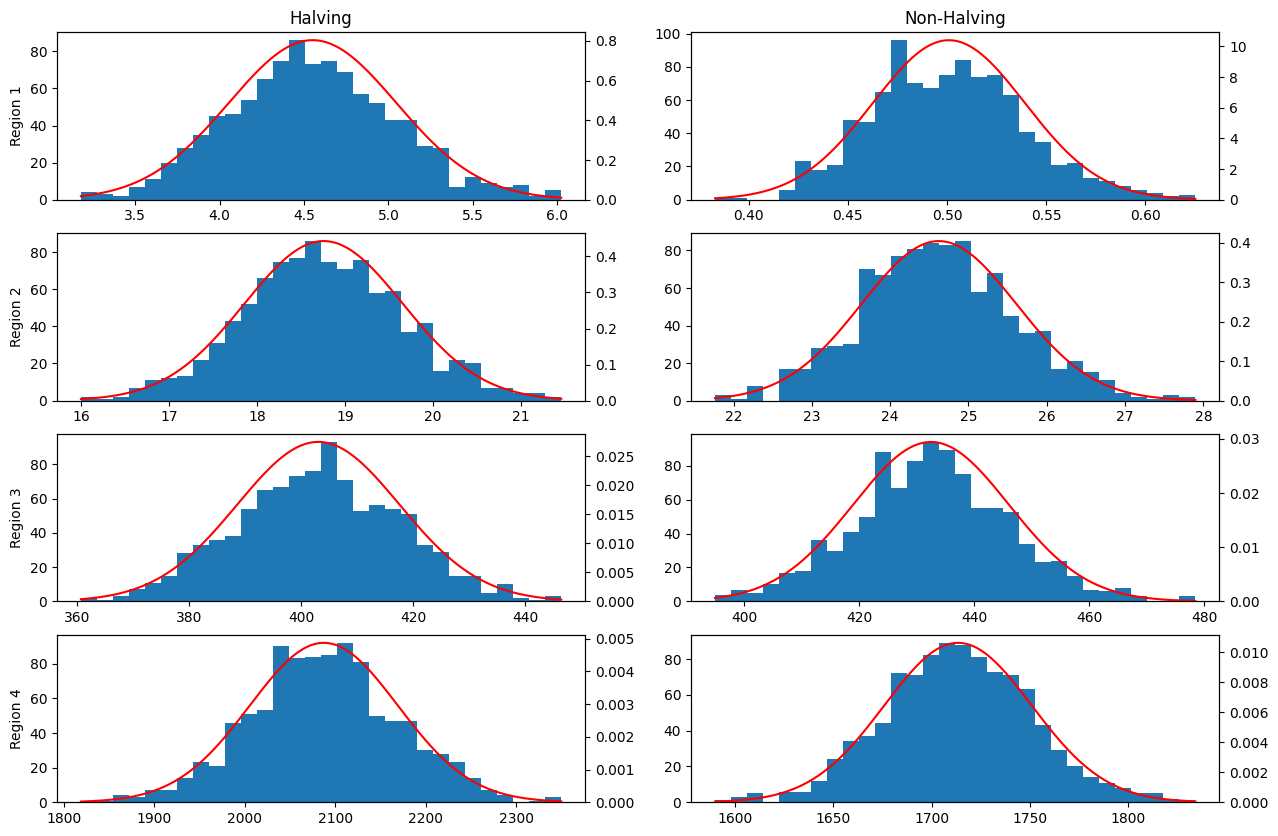

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming halving_data and nonhalving_data are already defined and contain the 'std_15' column

def bootstrap(data, num_samples=1000, statistic=np.mean):
    """Generate bootstrap samples and compute the statistic for each sample."""
    n = len(data)
    boot_samples = np.random.choice(data, (num_samples, n), replace=True)
    return np.array([statistic(sample) for sample in boot_samples])

# Number of bootstrap samples
num_samples = 1000

# Extracting std_15 data for halving and non-halving periods
halving_std = [item['std_15'].to_numpy() for item in halving_data]
nonhalving_std = [item['std_15'].to_numpy() for item in nonhalving_data]

# Bootstrap the mean std_15 for each period
bootstrapped_halving_means = [bootstrap(data, num_samples) for data in halving_std]
bootstrapped_nonhalving_means = [bootstrap(data, num_samples) for data in nonhalving_std]

# Calculate confidence intervals and p-values
confidence_level = 0.95
alpha = 1 - confidence_level
results = []
fig, ax = plt.subplots(4, 2, figsize=(15,10))
for i in range(len(bootstrapped_halving_means)):
    
    halving_mean = bootstrapped_halving_means[i]
    nonhalving_mean = bootstrapped_nonhalving_means[i]
    ax[i][0].hist(bootstrapped_halving_means[i], bins=30)
    x = np.linspace(min(bootstrapped_halving_means[i]), max(bootstrapped_halving_means[i]), 1000)
    params = norm.fit(bootstrapped_halving_means[i])
    pdf_fitted = norm.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    tx = ax[i][0].twinx()
    tx.plot(x, pdf_fitted, label='', color = 'r')
    tx.set_ylim(0)
    x = np.linspace(min(bootstrapped_nonhalving_means[i]), max(bootstrapped_nonhalving_means[i]), 1000)
    ax[i][1].hist(bootstrapped_nonhalving_means[i], bins=30)
    halving_mean = bootstrapped_halving_means[i]
    nonhalving_mean = bootstrapped_nonhalving_means[i]
    params = norm.fit(bootstrapped_nonhalving_means[i])
    pdf_fitted = norm.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    tx = ax[i][1].twinx()
    tx.plot(x, pdf_fitted, label='', color = 'r')
    tx.set_ylim(0)

    # Calculate confidence intervals
    ci_halving = np.percentile(halving_mean, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    ci_nonhalving = np.percentile(nonhalving_mean, [100 * alpha / 2, 100 * (1 - alpha / 2)])

    # Calculate p-value
    diff_means = halving_mean - nonhalving_mean
    p_value = np.mean(diff_means <= 0) if np.mean(halving_mean) > np.mean(nonhalving_mean) else np.mean(diff_means >= 0)

    results.append({
        'region': i + 1,
        'halving_mean': np.mean(halving_mean),
        'nonhalving_mean': np.mean(nonhalving_mean),
        'ci_halving': ci_halving,
        'ci_nonhalving': ci_nonhalving,
        'p_value': p_value
    })
rows = ['Region 1','Region 2','Region 3','Region 4']
cols = ['Halving', 'Non-Halving']

for axs, col in zip(ax[0], cols):
    axs.set_title(col,size='large')

for axs, row in zip(ax[:,0], rows):
    axs.set_ylabel(row, rotation=90 )

# Display results
results_df = pd.DataFrame(results)
results_df['reject_null'] = results_df['p_value'] < alpha


print(results_df)

In [105]:
# print(p_values)
alpha = 0.05
results_df.sort_values(by='p_value', inplace=True) # Sort in place!
results_df['L_thresholds'] = alpha/(df_stat.shape[0] + 1 - (np.arange(df_stat.shape[0]) + 1)) 
results_df['reject_null'] = results_df['p_value'] < results_df['L_thresholds']
results_df.reset_index(drop=True, inplace=True)
print(results_df)
different = 0
if any(results_df['reject_null'] == True):
    different = max(results_df.loc[results_df['reject_null'] == True].index +1)
not_different = len(results_df.index) - different
print(f'\n2- Tailed Bootstrap Test - Halving/Non-Halving regions that are not statistically different: {not_different/(different+not_different) * 100}%\n')

   region  halving_mean  nonhalving_mean  \
0       1      4.550663         0.500944   
1       2     18.754678        24.622582   
2       4   2087.440180      1713.440698   
3       3    403.089989       432.508135   

                                 ci_halving  \
0  [3.6398929848299324, 5.6011106158378325]   
1   [16.93484991344696, 20.516455298210516]   
2   [1926.461576922623, 2248.0570347416065]   
3   [376.4123154158498, 431.25629820597663]   

                              ci_nonhalving  p_value  reject_null  \
0  [0.42805055108917306, 0.582607061311654]    0.000         True   
1   [22.777308634700077, 26.60473342328717]    0.000         True   
2   [1640.7737224861237, 1789.738062236158]    0.000         True   
3  [405.52505003276684, 459.29375040367717]    0.074        False   

   L_thresholds  
0      0.012500  
1      0.016667  
2      0.025000  
3      0.050000  

2- Tailed Bootstrap Test - Halving/Non-Halving regions that are not statistically different: 25.0%



One-tailed, Bootstrap

   region  halving_mean  nonhalving_mean  \
0       1      4.559488         0.505103   
1       2     18.814769        24.670245   
2       3    404.515733       432.000629   
3       4   2088.053561      1715.660317   

                                 ci_halving  \
0    [3.589769681514747, 5.571450480142699]   
1  [17.079596819425298, 20.747411346785945]   
2    [375.1559235192421, 432.1653268876072]   
3  [1937.8391049206816, 2239.0983419968243]   

                              ci_nonhalving  p_value  reject_null  
0  [0.4328046638104115, 0.5789129068731651]    1.000        False  
1  [22.696576309713567, 26.798197891275972]    0.000         True  
2  [406.22431477184904, 459.37857210439165]    0.076        False  
3   [1638.4006798328871, 1790.343461621619]    1.000        False  


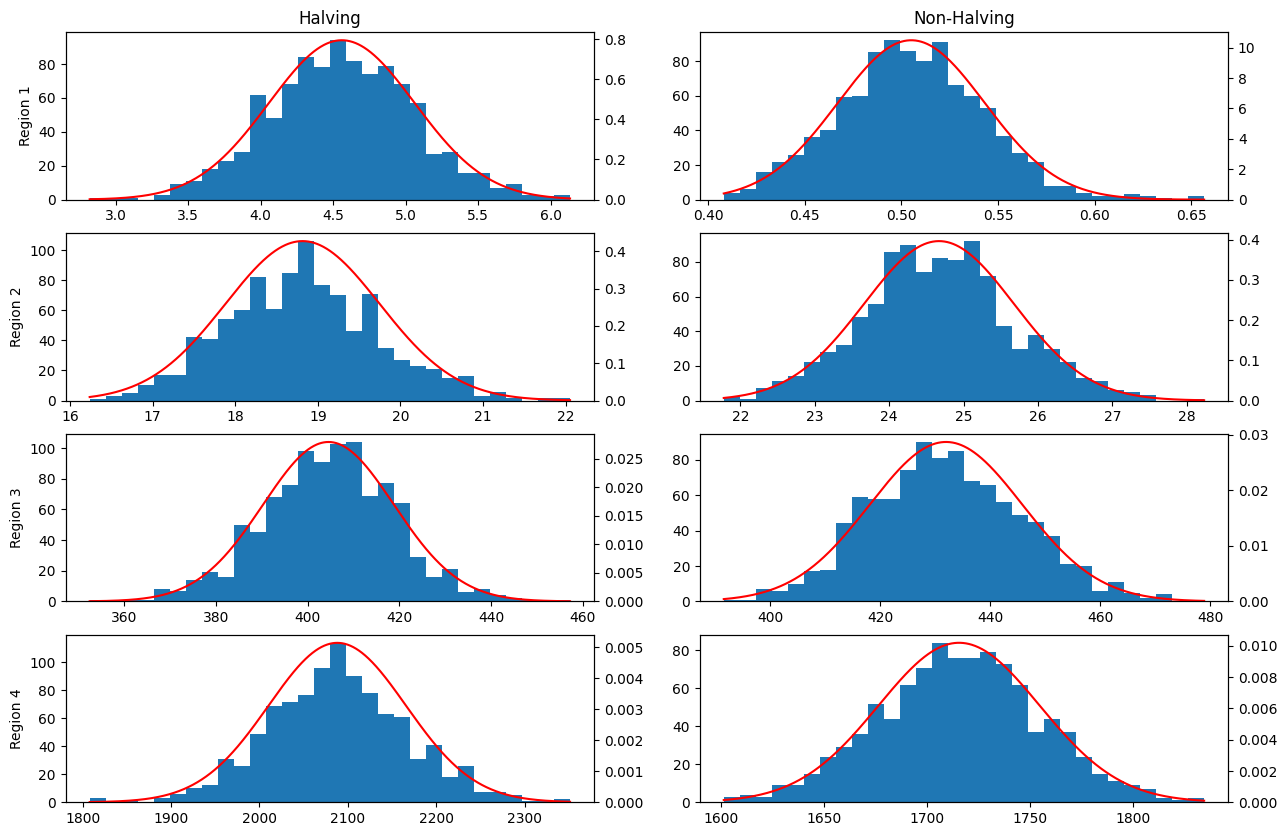

In [106]:
# One-tailed
# Null hypothesis : mean std_15 during Halving periods is greater than during Non-Halving periods

def bootstrap(data, num_samples=1000, statistic=np.mean):
    """Generate bootstrap samples and compute the statistic for each sample."""
    n = len(data)
    boot_samples = np.random.choice(data, (num_samples, n), replace=True)
    return np.array([statistic(sample) for sample in boot_samples])

# Number of bootstrap samples
num_samples = 1000

# Extracting std_15 data for halving and non-halving periods
halving_std = [item['std_15'].to_numpy() for item in halving_data]
nonhalving_std = [item['std_15'].to_numpy() for item in nonhalving_data]

# Bootstrap the mean std_15 for each period
bootstrapped_halving_means = [bootstrap(data, num_samples) for data in halving_std]
bootstrapped_nonhalving_means = [bootstrap(data, num_samples) for data in nonhalving_std]



# Calculate confidence intervals and p-values
confidence_level = 0.95
alpha = 1 - confidence_level
results = []
fig, ax = plt.subplots(4, 2, figsize=(15,10))
for i in range(len(bootstrapped_halving_means)):
    ax[i][0].hist(bootstrapped_halving_means[i], bins=30)
    x = np.linspace(min(bootstrapped_halving_means[i]), max(bootstrapped_halving_means[i]), 1000)
    params = norm.fit(bootstrapped_halving_means[i])
    pdf_fitted = norm.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    tx = ax[i][0].twinx()
    tx.plot(x, pdf_fitted, label='', color = 'r')
    tx.set_ylim(0)
    x = np.linspace(min(bootstrapped_nonhalving_means[i]), max(bootstrapped_nonhalving_means[i]), 1000)
    ax[i][1].hist(bootstrapped_nonhalving_means[i], bins=30)
    halving_mean = bootstrapped_halving_means[i]
    nonhalving_mean = bootstrapped_nonhalving_means[i]
    params = norm.fit(bootstrapped_nonhalving_means[i])
    pdf_fitted = norm.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    tx = ax[i][1].twinx()
    tx.plot(x, pdf_fitted, label='', color = 'r')
    tx.set_ylim(0)

    # Calculate p-value for one-tailed test
    diff_means = halving_mean - nonhalving_mean
    p_value = np.mean(diff_means >= 0)  # One-tailed test: checking if halving_mean is greater than nonhalving_mean

    results.append({
        'region': i + 1,
        'halving_mean': np.mean(halving_mean),
        'nonhalving_mean': np.mean(nonhalving_mean),
        'ci_halving': np.percentile(halving_mean, [100 * alpha / 2, 100 * (1 - alpha / 2)]),
        'ci_nonhalving': np.percentile(nonhalving_mean, [100 * alpha / 2, 100 * (1 - alpha / 2)]),
        'p_value': p_value
    })
rows = ['Region 1','Region 2','Region 3','Region 4']
cols = ['Halving', 'Non-Halving']

for axs, col in zip(ax[0], cols):
    axs.set_title(col,size='large')

for axs, row in zip(ax[:,0], rows):
    axs.set_ylabel(row, rotation=90 )
# Display results
results_df = pd.DataFrame(results)
results_df['reject_null'] = results_df['p_value'] < alpha

print(results_df)


In [107]:
# print(p_values)
alpha = 0.05
results_df.sort_values(by='p_value', inplace=True) # Sort in place!
results_df['L_thresholds'] = alpha/(df_stat.shape[0] + 1 - (np.arange(df_stat.shape[0]) + 1)) 
results_df['reject_null'] = results_df['p_value'] < results_df['L_thresholds']
results_df.reset_index(inplace=True, drop=True)
print(results_df)
different = 0
if any(results_df['reject_null'] == True):
    different = max(results_df.loc[results_df['reject_null'] == True].index +1)
not_different = len(results_df.index) - different
print(f'\n1- Tailed Bootstrap Test - Halving/Non-Halving regions that are not statistically different: {not_different/(different+not_different) * 100}%\n')

   region  halving_mean  nonhalving_mean  \
0       2     18.814769        24.670245   
1       3    404.515733       432.000629   
2       1      4.559488         0.505103   
3       4   2088.053561      1715.660317   

                                 ci_halving  \
0  [17.079596819425298, 20.747411346785945]   
1    [375.1559235192421, 432.1653268876072]   
2    [3.589769681514747, 5.571450480142699]   
3  [1937.8391049206816, 2239.0983419968243]   

                              ci_nonhalving  p_value  reject_null  \
0  [22.696576309713567, 26.798197891275972]    0.000         True   
1  [406.22431477184904, 459.37857210439165]    0.076        False   
2  [0.4328046638104115, 0.5789129068731651]    1.000        False   
3   [1638.4006798328871, 1790.343461621619]    1.000        False   

   L_thresholds  
0      0.012500  
1      0.016667  
2      0.025000  
3      0.050000  

1- Tailed Bootstrap Test - Halving/Non-Halving regions that are not statistically different: 75.0%



Check among sub-sections in the non-halving regions

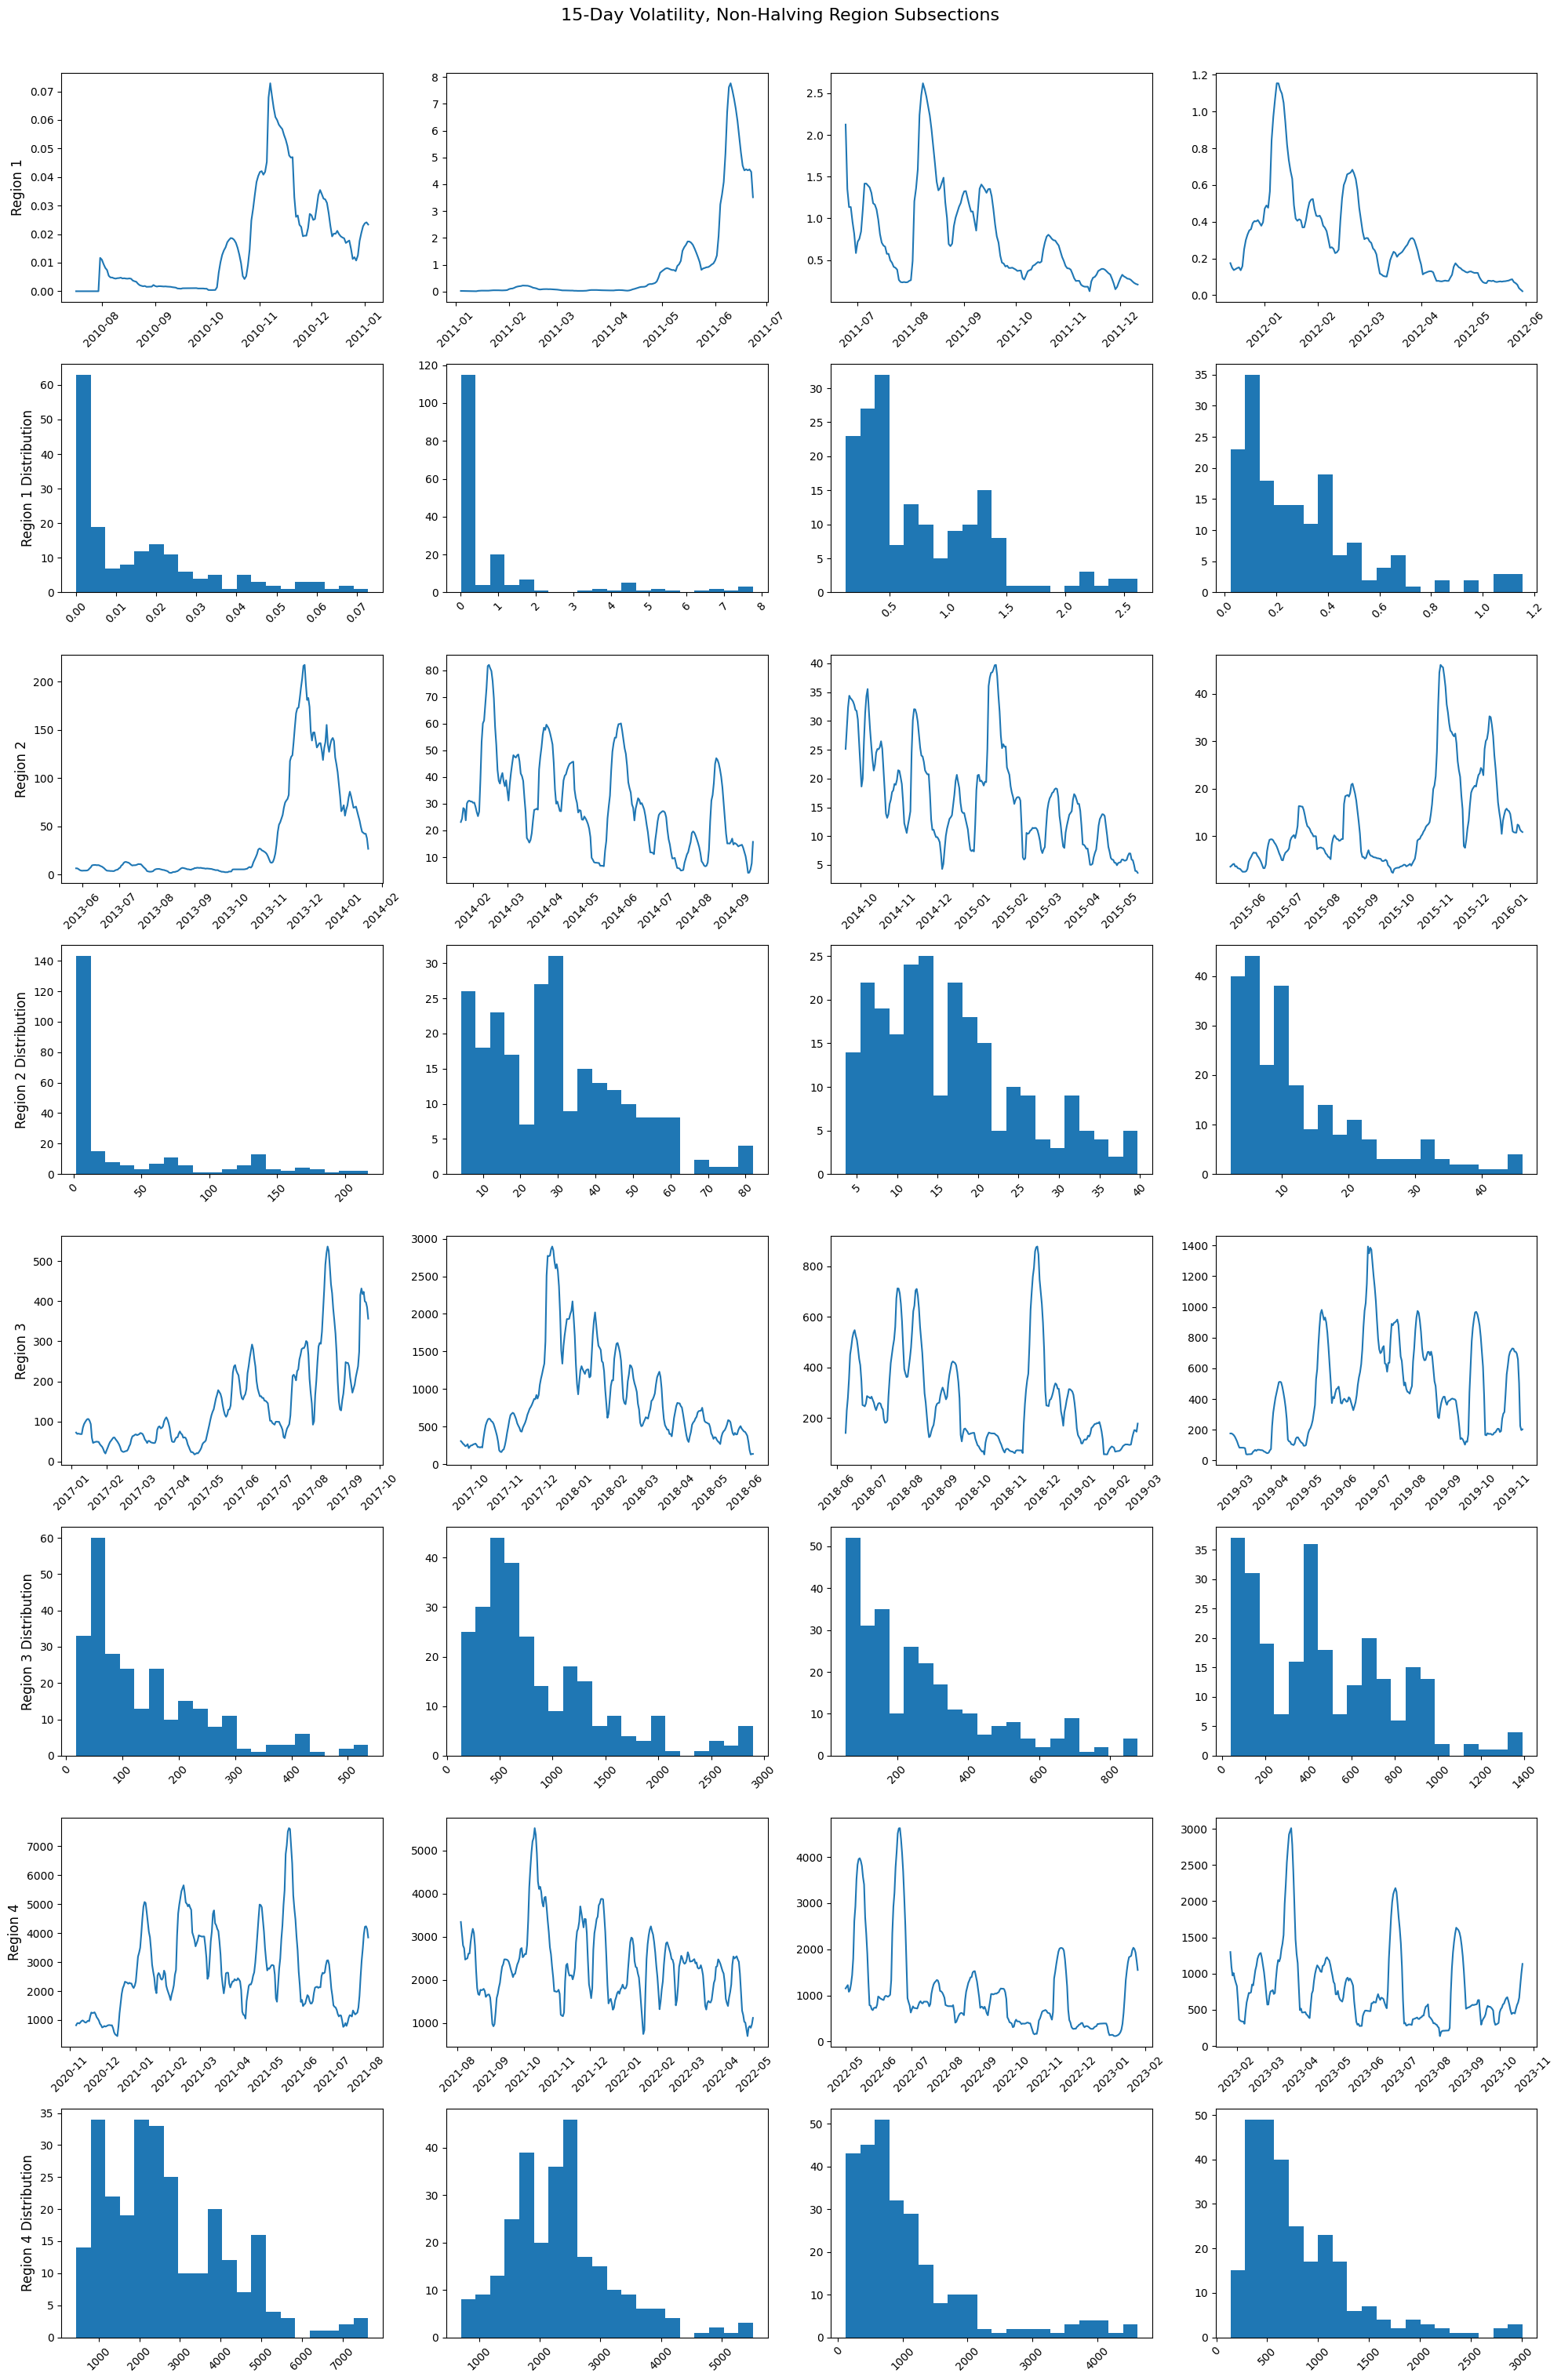

In [108]:
fig, ax = plt.subplots(8, 4, figsize=(20,30))
regions = []
for idx, region in enumerate(nonhalving_data):
    # divide region in to 4 subsections and compare them:
    size = math.floor(len(region.index)/4)
    subsections = []
    # print(len(region.index))
    # print(size)
    for i in range(4):
        subsections.append(region.iloc[i * size:(i+1)*size])
        # print(len(subsections[i].index))
        ax[idx * 2][i].plot(subsections[i]['std_15'])
        ax[idx * 2][i].tick_params(axis='x', labelrotation=45)
        ax[idx * 2][0].set_ylabel(f'Region {idx+1}', rotation=90, size='large')
        ax[idx * 2 + 1][i].hist(subsections[i]['std_15'], bins=20)
        ax[idx * 2 + 1][i].tick_params(axis='x', labelrotation=45)
        ax[idx * 2 + 1][0].set_ylabel(f'Region {idx+1} Distribution', rotation=90, size='large')
    regions.append(subsections)
    plt.tight_layout()
    fig.suptitle('15-Day Volatility, Non-Halving Region Subsections',fontsize=16, y=1.01)
    

Do the same Hypothesis Testing among these regions

 Mann-Whitney U Test

In [109]:
alpha = 0.05
for idx, region in enumerate(regions):
    indices = itertools.combinations(region,2)
    sec_p_values = {}
    for j, item in enumerate(indices):
        stat, p_value = mannwhitneyu(item[0]['std_15'], item[1]['std_15'])
        # print(f'p-value = {p_value:.6f}')
        # if p_value <= alpha:
        #     print(f'p-value less than alpha! Reject H0.\n\n')
        # else:
        #     print(f'p-value greater than alpha! Cannot Reject H0.\n\n')
        sec_p_values[j]=p_value
    # Holm's Stepdown Procedure
    df_sec_stat=pd.DataFrame()
    df_sec_stat['region']=sec_p_values.keys()
    df_sec_stat['p_value']=sec_p_values.values()
    alpha = 0.05
    df_sec_stat.sort_values(by='p_value', inplace=True) # Sort in place!
    df_sec_stat['L_thresholds'] = alpha/(df_sec_stat.shape[0] + 1 - (np.arange(df_sec_stat.shape[0]) + 1)) 
    df_sec_stat['reject'] = df_sec_stat['p_value'] < df_sec_stat['L_thresholds']
    df_sec_stat.reset_index(drop=True, inplace=True)
    print(df_sec_stat)
    different = 0
    if any(df_sec_stat['reject'] == True):
        different = max(df_sec_stat.loc[df_sec_stat['reject'] == True].index +1)
    not_different = len(df_sec_stat.index) - different
    print(f'\n Mann-Whitney U Test - Non-Halving subsections that are not statistically different for Region {idx+1}: {not_different/(different+not_different) * 100}%\n')
        

   region       p_value  L_thresholds  reject
0       1  1.447022e-57      0.008333    True
1       2  1.180198e-56      0.010000    True
2       0  2.425882e-45      0.012500    True
3       5  1.048101e-22      0.016667    True
4       3  4.673508e-12      0.025000    True
5       4  7.151344e-03      0.050000    True

 Mann-Whitney U Test - Non-Halving subsections that are not statistically different for Region 1: 0.0%

   region       p_value  L_thresholds  reject
0       4  5.638971e-33      0.008333    True
1       3  2.011372e-18      0.010000    True
2       5  3.889037e-10      0.012500    True
3       0  5.703163e-08      0.016667    True
4       1  7.271376e-03      0.025000    True
5       2  5.248205e-02      0.050000   False

 Mann-Whitney U Test - Non-Halving subsections that are not statistically different for Region 2: 16.666666666666664%

   region       p_value  L_thresholds  reject
0       0  1.525936e-75      0.008333    True
1       3  1.100998e-50      0.010000  

Wilcoxon Signed-Rank Test

In [110]:
alpha = 0.05
for idx, region in enumerate(regions):
    indices = itertools.combinations(region,2)
    sec_p_values = {}
    for j, item in enumerate(indices):
        n = len(item[0])
        stat, p_value = wilcoxon(item[0]['std_15'], item[1]['std_15'][:n])
        # stat, p_value = mannwhitneyu(item[0]['std_15'], item[1]['std_15'])
        # print(f'p-value = {p_value:.6f}')
        # if p_value <= alpha:
        #     print(f'p-value less than alpha! Reject H0.\n\n')
        # else:
        #     print(f'p-value greater than alpha! Cannot Reject H0.\n\n')
        sec_p_values[j]=p_value
    # Holm's Stepdown Procedure
    df_sec_stat=pd.DataFrame()
    df_sec_stat['region']=sec_p_values.keys()
    df_sec_stat['p_value']=sec_p_values.values()
    alpha = 0.05
    df_sec_stat.sort_values(by='p_value', inplace=True) # Sort in place!
    df_sec_stat['L_thresholds'] = alpha/(df_sec_stat.shape[0] + 1 - (np.arange(df_sec_stat.shape[0]) + 1)) 
    df_sec_stat['reject'] = df_sec_stat['p_value'] < df_sec_stat['L_thresholds']
    df_sec_stat.reset_index(drop=True, inplace=True)
    print(df_sec_stat)
    different = 0
    if any(df_sec_stat['reject'] == True):
        different = max(df_sec_stat.loc[df_sec_stat['reject'] == True].index +1)
    not_different = len(df_sec_stat.index) - different
    print(f'\nWilcoxon Signed-Rank Test - Non-Halving subsections that are not statistically different for Region {idx+1}: {not_different/(different+not_different) * 100}%\n')
        

   region       p_value  L_thresholds  reject
0       0  8.196709e-30      0.008333    True
1       1  8.196709e-30      0.010000    True
2       2  8.342461e-30      0.012500    True
3       5  5.969934e-20      0.016667    True
4       3  9.061202e-03      0.025000    True
5       4  3.389276e-01      0.050000   False

Wilcoxon Signed-Rank Test - Non-Halving subsections that are not statistically different for Region 1: 16.666666666666664%

   region       p_value  L_thresholds  reject
0       3  2.868999e-23      0.008333    True
1       4  4.207028e-22      0.010000    True
2       2  1.541205e-11      0.012500    True
3       5  1.650990e-04      0.016667    True
4       1  5.418085e-02      0.025000   False
5       0  8.701503e-01      0.050000   False

Wilcoxon Signed-Rank Test - Non-Halving subsections that are not statistically different for Region 2: 33.33333333333333%

   region       p_value  L_thresholds  reject
0       0  2.598465e-42      0.008333    True
1       3  2.54